In [1]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

# **Goal**

The goal of this assignment is to find and develop a suitable model for determining the prognosis of a disease. The raw data itself includes a sizable number of paramters which can be used in training the data and developing a suitable model that can be used to create an accurate model.

## **Import Data**

We first import the data on human disease. Originally from https://www.kaggle.com/datasets/nitishjolly/human-disease-dataset/data

This dataset has 132 parameters on which 41 different types of diseases can be predicted and it is already split into training and testing dataset.

We shall import the data as training and test sets.

In [2]:
df_train = pd.read_csv('https://github.com/canonink/Diabetes/blob/main/Training.csv?raw=true')
df_test = pd.read_csv("https://github.com/canonink/Diabetes/blob/main/Testing.csv?raw=true")

In [3]:
#Here I count the frequency of each prognosis
df_train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

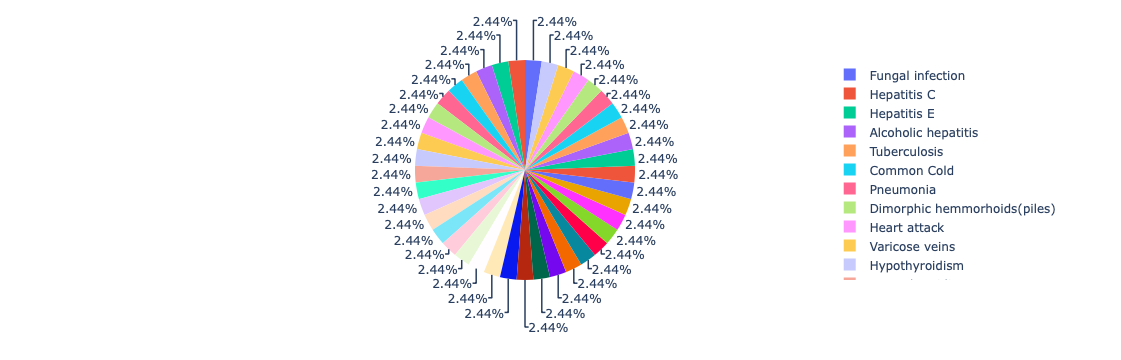

In [5]:
from plotly import express as exp, graph_objs as go

prog_counts = df_train.prognosis.value_counts()
exp.pie(values=prog_counts.values,names=prog_counts.keys())


In [6]:
#It looks like fungal infection is repeated
df_test['prognosis'].head(42)

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [7]:
#remove last row 
df_test = df_test.head(41)
df_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [8]:
#create a reference dataframe where prognosis is coded as numeric
row_to_sort_by = 'prognosis'

df_test_sorted = df_test.sort_values(by=row_to_sort_by)
name = df_test_sorted['prognosis']
name
numeric_codes = range(len(df_test_sorted))

df_reference = pd.DataFrame({'Code': numeric_codes, 'Prognosis': name})
df_reference


,Code,Prognosis
36,0,(vertigo) Paroymsal Positional Vertigo
6,1,AIDS
37,2,Acne
24,3,Alcoholic hepatitis
1,4,Allergy
35,5,Arthritis
9,6,Bronchial Asthma
12,7,Cervical spondylosis
16,8,Chicken pox
3,9,Chronic cholestasis


In [9]:
#turn prognosis for train and test data into numeric codes
df_train['prognosis'] = pd.factorize(df_train['prognosis'], sort=True)[0]
df_test['prognosis'] = pd.factorize(df_test['prognosis'], sort=True)[0]
df_test


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


<AxesSubplot:>

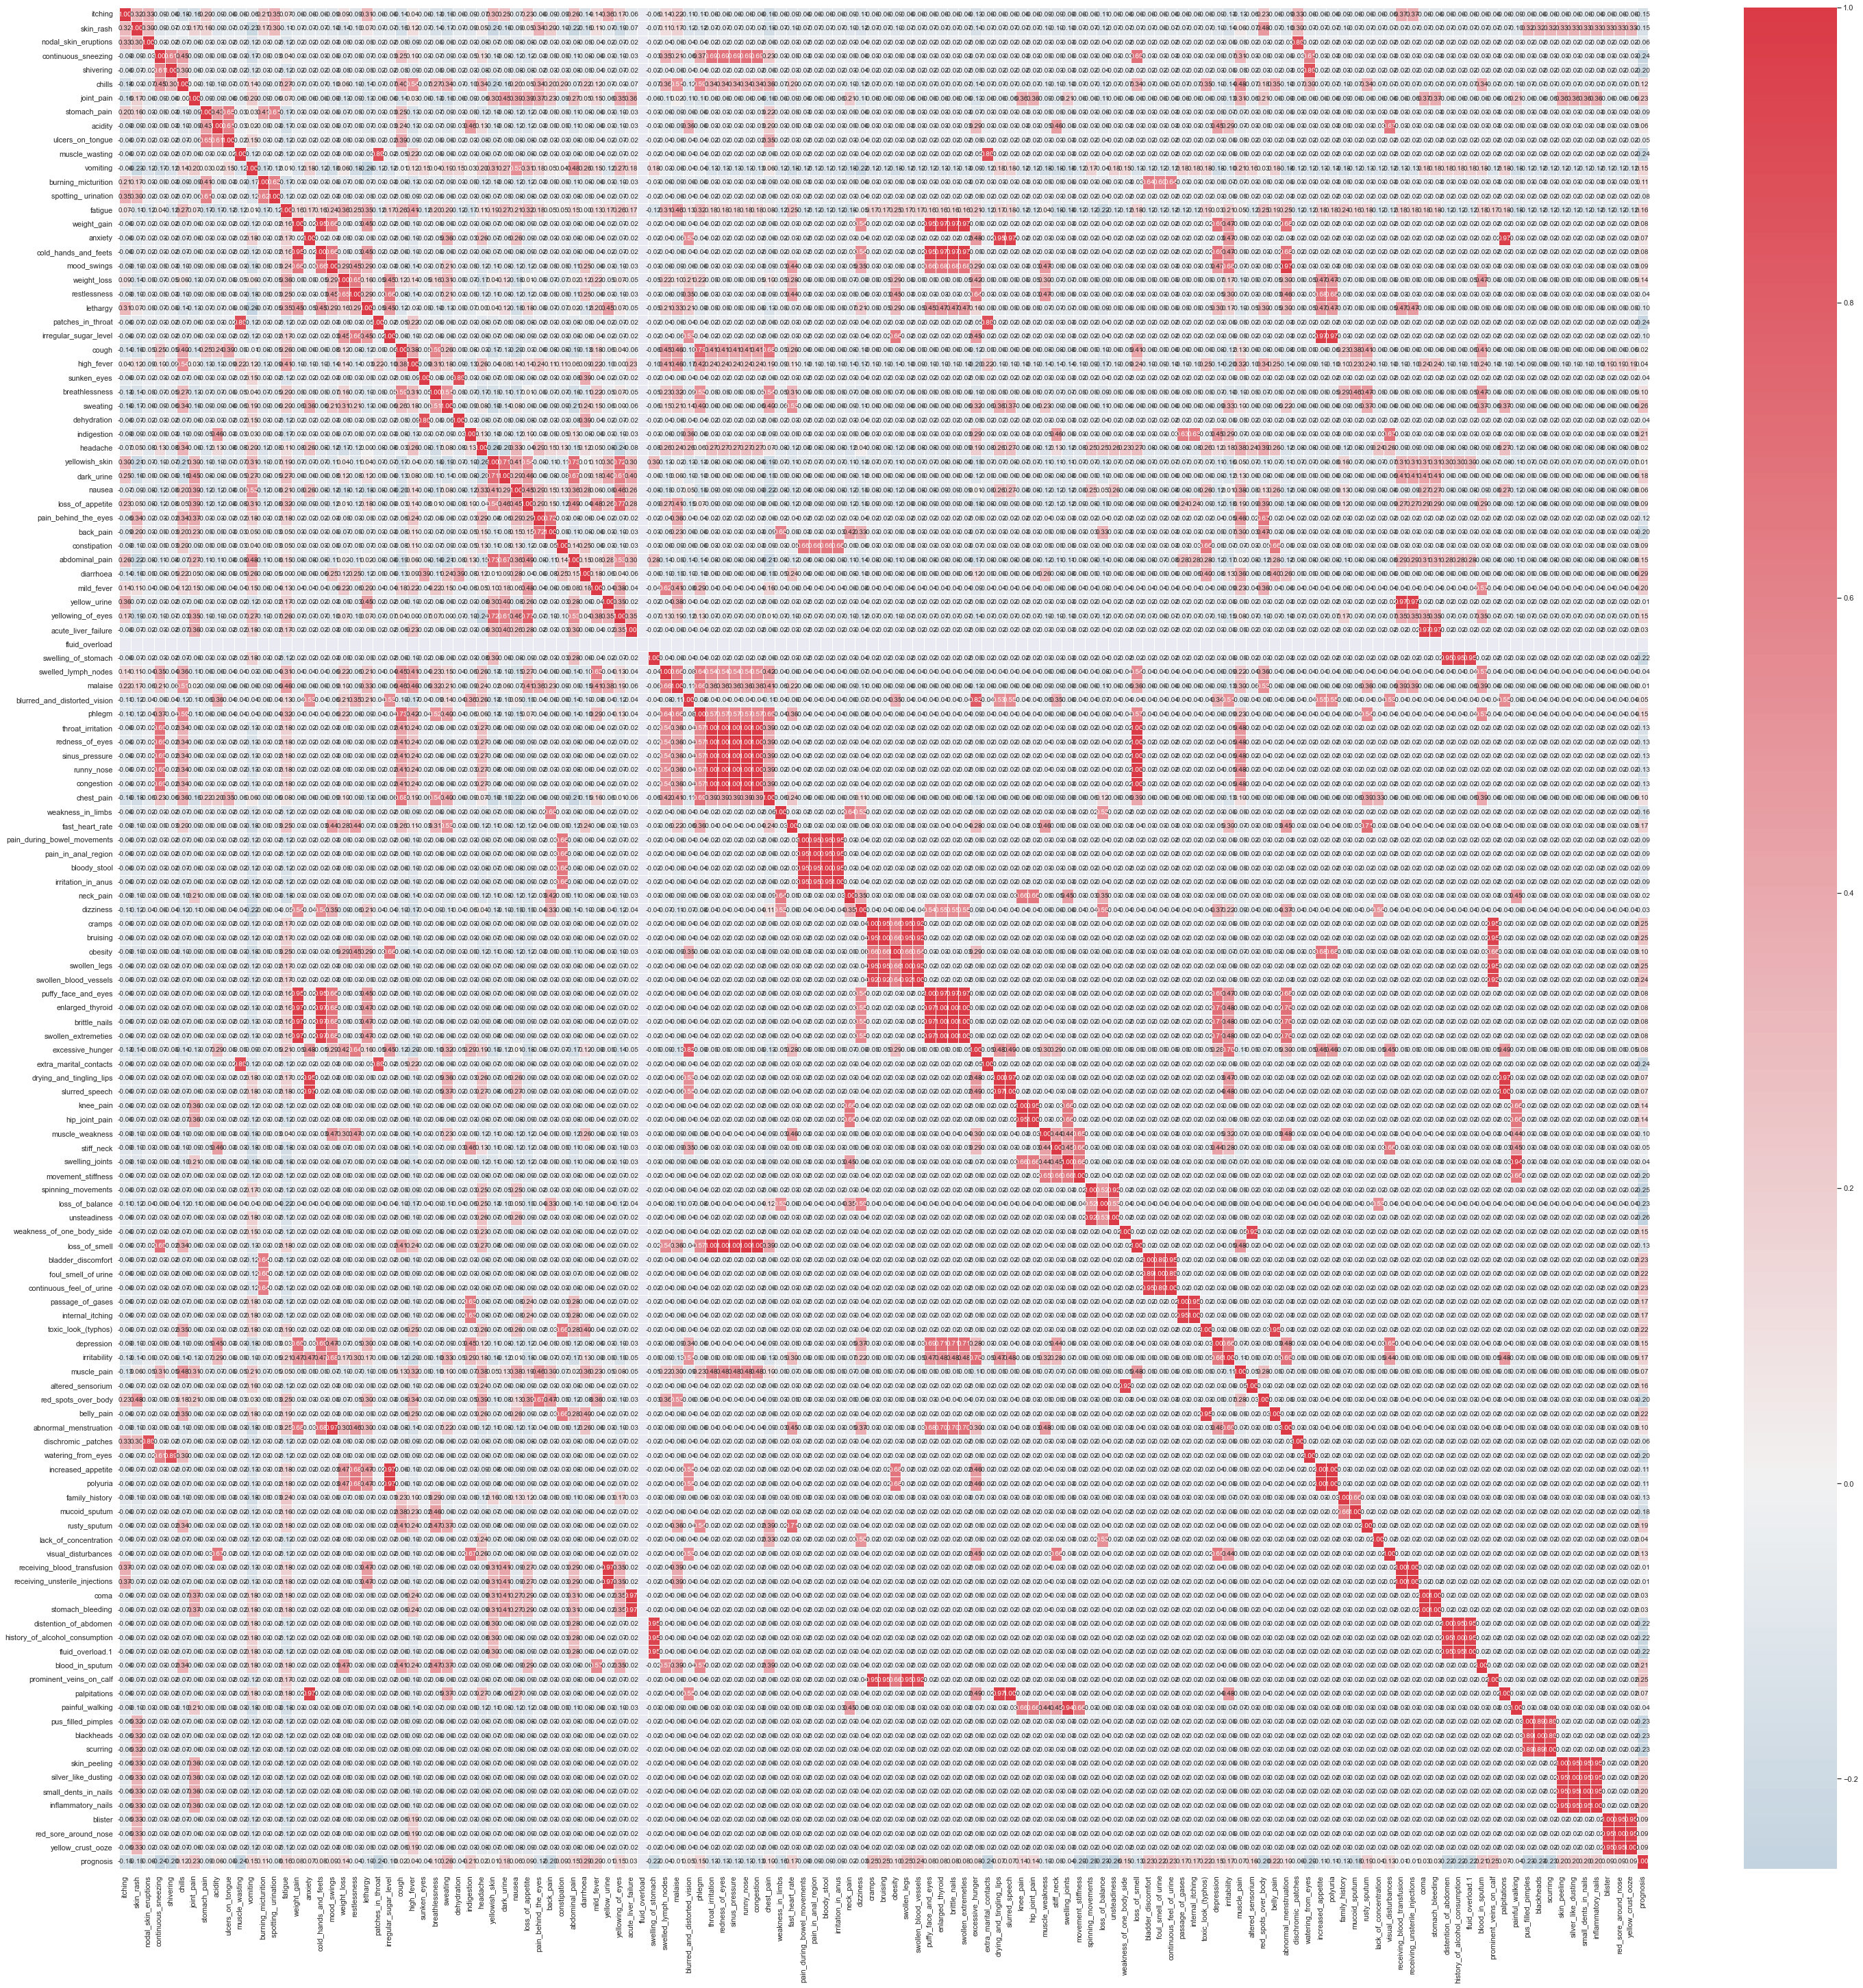

In [10]:
#create heatmap

import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))

sns.heatmap(df_train.corr(), annot=True, fmt=".2f", linewidths=.5, center=0, cmap=sns.diverging_palette(240, 10, as_cmap=True))

## Training and test sets

Now I will split the data into the X and Y of the training and test sets in order to develop the model.


In [12]:
from sklearn.model_selection import train_test_split

#Split the data for df_train into X and y for training and test sets
X = df_train.drop('prognosis', axis = 1)
y = df_train['prognosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#plot a multi linear regression using data
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              prognosis   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              3211.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                        0.00
Time:                        11:56:42   Log-Likelihood:                         -8863.6
No. Observations:                3936   AIC:                                  1.797e+04
Df Residuals:                    3816   BIC:                                  1.872e+04
Df Model:                         120                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Studying Hepatitis

Realising that the data frame of 41 prognosis is too big, I will attempt to narrow down my selection. Among all the prognosis, hepatitis looks the most promising as a general prognosis to narrow down. Namely, the different types of prognosis studied will be alcoholic hepatitis, hepatis A, hepatitis B, hepatitis C, hepatitis D, hepatitis E.



In [14]:
#40, 22, 21, 20, 19, 3

#After looking through the data, it seems there are too many prognosis to look through.
#As such, I would like to narrow down the number of prognosis that is being studied.
#I will focus on the different types of hepatitis.
#alcoholic hepatitis, hepatis A, hepatitis B, hepatitis C, hepatitis D, hepatitis E
#These prognoses are coded as 3, 40, 19, 20, 21, 22 respectively

#narrow down the number of prognosis
# List of specific values to select
specific_prognosis = [3, 19, 20, 21, 22, 40]

# Select rows with specific values in the 'prognosis' column
df_hep = df_train[df_train['prognosis'].isin(specific_prognosis)]
df_hep

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
190,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
191,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40
193,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
194,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
4901,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,22


In [15]:
#Split the hepatitis data into X and y for training and test sets
X = df_hep.drop('prognosis', axis = 1)
y = df_hep['prognosis']
X_train_hep, X_test_hep, y_train_hep, y_test_hep = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelling

I wanted to explore different models for my machine learning algorithm. I first started with logistic regression as I realised that the prognoses exist as binary outcomes. Hence, it might be useful for logistic regression to be used as a model.

Subsequently, I also explored other datasets such as decision tree, random forest, and adaboost to give a little variation to the results. 

### Using Logistic Regression

In [24]:
#train logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_hep, y_train_hep)

# Predict on the test set
y_pred = model.predict(X_test_hep)

# Calculate accuracy
accuracy = accuracy_score(y_test_hep, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


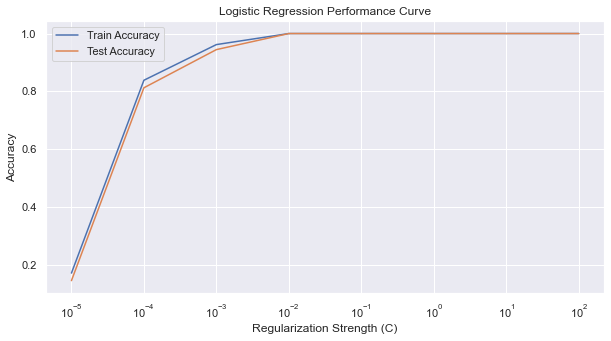

In [25]:
# Train Logistic Regression models with different hyperparameters
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
train_accuracy = []
test_accuracy = []

for C in C_values:
    # Create and train the Logistic Regression classifier
    lr_classifier = LogisticRegression(C=C, random_state=42)
    lr_classifier.fit(X_train_hep, y_train_hep)
    
    # Record training and test accuracy
    train_accuracy.append(accuracy_score(y_train_hep, lr_classifier.predict(X_train_hep)))
    test_accuracy.append(accuracy_score(y_test_hep, lr_classifier.predict(X_test_hep)))

# Plot performance curve
plt.figure(figsize=(10, 5))
plt.plot(C_values, train_accuracy, label='Train Accuracy')
plt.plot(C_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Logistic Regression Performance Curve')
plt.legend()
plt.grid(True)
plt.show()


## Using Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_hep,y_train_hep)

#Predict the response for test dataset
y_pred = clf.predict(X_test_hep)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_hep, y_pred))

Accuracy: 1.0


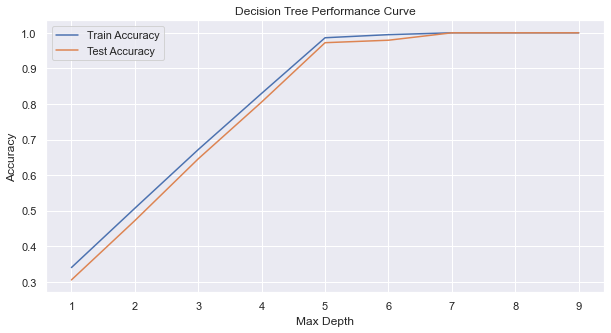

In [19]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Max depth of the tree
train_accuracy = []
test_accuracy = []

for max_depth in max_depth_values:
    # Create and train the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train_hep, y_train_hep)
    
    # Record training and test accuracy
    train_accuracy.append(accuracy_score(y_train_hep, dt_classifier.predict(X_train_hep)))
    test_accuracy.append(accuracy_score(y_test_hep, dt_classifier.predict(X_test_hep)))

# Plot performance curve
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, train_accuracy, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance Curve')
plt.legend()
plt.grid(True)
plt.show()


## Using Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_hep, y_train_hep)

y_pred = rf.predict(X_test_hep)

accuracy = accuracy_score(y_test_hep, y_pred)
print("Accuracy:", accuracy)



Accuracy: 1.0


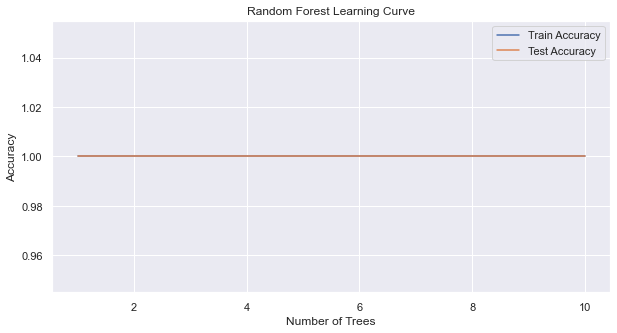

In [21]:
import matplotlib.pyplot as plt

n_estimators_list = [10, 50, 100, 200]
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimators_list:
    # Create and train the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(X_train_hep, y_train_hep)
    
    # Record training and test accuracy
    train_accuracy.append(accuracy_score(y_train_hep, rf_classifier.predict(X_train_hep)))
    test_accuracy.append(accuracy_score(y_test_hep, rf_classifier.predict(X_test_hep)))

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_list, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


## Using Adaboost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier(n_estimators=100, random_state=42)
ad.fit(X_train_hep, y_train_hep)

y_pred = ad.predict(X_test_hep)

accuracy = accuracy_score(y_test_hep, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6458333333333334


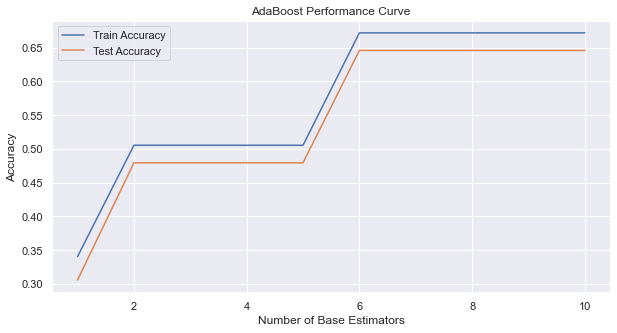

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost classifiers with different numbers of base estimators
n_estimators_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Number of base estimators
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimators_values:
    # Create and train the AdaBoost classifier
    adaboost_classifier = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    adaboost_classifier.fit(X_train_hep, y_train_hep)
    
    # Record training and test accuracy
    train_accuracy.append(accuracy_score(y_train_hep, adaboost_classifier.predict(X_train_hep)))
    test_accuracy.append(accuracy_score(y_test_hep, adaboost_classifier.predict(X_test_hep)))

# Plot performance curve
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance Curve')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

All in all, the exploration allowed me to narrow down the data and find inconsistencies.

I also explored different model that achieved great accuracy and good fitting, especially Logistic Regression and Decision Tree.

Logistic regression could have performed well because it is a simple linear model suitable for binary classification tasks. It could have worked well when the relationship between features and target variable is linear. However, it has limited capacity to capture complex patterns. For this case, the dataset was relatively simple.

Decision tree performed quite well as there could have been interactiosn between each of the parameters (or symptoms). It could have captured complex relationships and interactions in the data.

Adaboost could have performed poorly as there could have been outliers with the parameters or noise within the data.

The high accuracy could be due to the nature of the raw data, where the symptoms are clearly defined for each prognosis.


